In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from ML2_lib import valid

In [2]:
print("hoge")

hoge


In [3]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = RV_SGDAve.RVSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)

In [4]:
exp_normal.learn(10,w_init)

(array([[2.58442968, 2.16426261, 3.61961539, 3.6337155 , 5.60022844,
         3.39520926]]),
 295.82018845985203,
  <ML2_lib.algo_sgd.SGD at 0x1283e0ca0>])

In [5]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)


  0%|          | 0/10 [00:00<?, ?it/s]

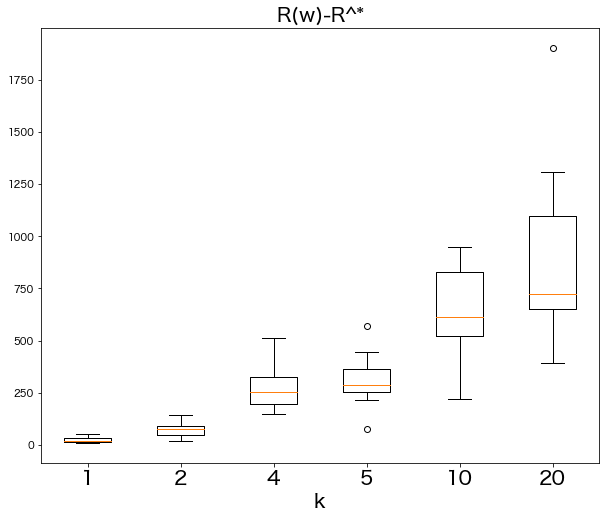

In [6]:
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()